In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
%matplotlib inline

In [3]:
sep_rep = "data/uber-raw-data-sep14.csv"
sep_df = pd.read_csv(sep_rep)
sep_df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [4]:
print (sep_df.Lat.max() , sep_df.Lat.min())
print (sep_df.Lon.max() , sep_df.Lon.min())

(41.3476, 39.989699999999999)
(-72.716300000000004, -74.773600000000002)


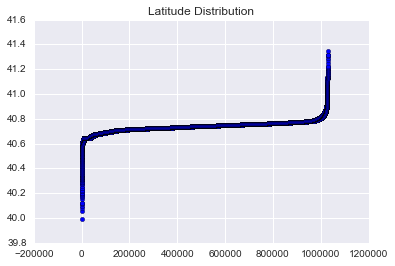

In [25]:
plt.scatter(range(sep_df.shape[0]), np.sort(sep_df.Lat.values))
plt.title("Latitude Distribution")
plt.show()

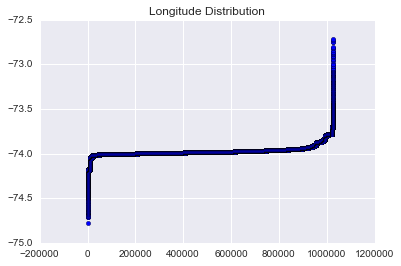

In [7]:
plt.scatter(range(sep_df.shape[0]), np.sort(sep_df.Lon.values))
plt.title("Longitude Distribution")
plt.show()

C:\Users\RAHUL\Anaconda2\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


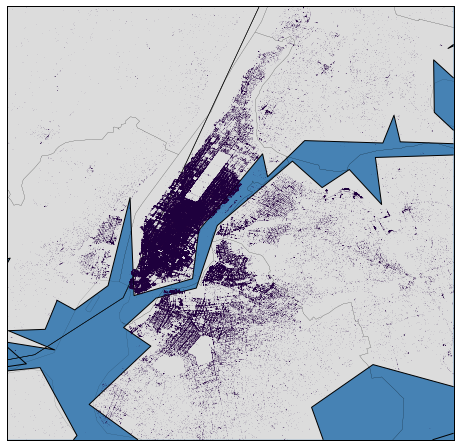

In [9]:
plt.figure(figsize=(8,8))
themap = Basemap(projection='gall',
              llcrnrlon = -74.1,              # lower-left corner longitude
              llcrnrlat = 40.6,               # lower-left corner latitude
              urcrnrlon = -73.8,               # upper-right corner longitude
              urcrnrlat = 40.9,               # upper-right corner latitude
              resolution = 'i',
              area_thresh = 100.0
              )

themap.drawcoastlines()
themap.drawstates()
themap.drawcounties()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

sep_df['Lon'].ix[sep_df['Lon'] > -73.8] = -73.8
sep_df['Lon'].ix[sep_df['Lon'] < -74.1] = -74.1
sep_df['Lat'].ix[sep_df['Lat'] > 40.9] = 40.9
sep_df['Lat'].ix[sep_df['Lat'] < 40.6] = 40.6

x, y = themap(np.array(sep_df['Lon']), np.array(sep_df['Lat']))
themap.plot(x, y, 
            'o',                    # marker shape
            color='Indigo',         # marker colour
            markersize=0.2            # marker size
            )

plt.show()